In [ ]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Function to read product details from a file
def read_products(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]  # Skipping the header line
        products = {}
        for line in lines:
            details = {}
            product_id = line.split(',')[0]
            name = line.split(',')[1]
            price = float(line.split(',')[2])
            details['name'] = name
            details['price'] = price
            products[product_id] = details
    return products

# Function to read sales transactions from a file
def read_sales(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]  # Skipping the header line
        sales = []
        for line in lines:
            sale = {}
            sale['transaction_id'] = line.split(',')[0]
            date = line.split(',')[1]
            date = date.split('-')
            date = '/'.join(date)
            updated_date = datetime.strptime(date, '%Y/%m/%d')
            sale['date'] = updated_date
            sale['product_id'] = line.split(',')[2]
            sale['quantity'] = int(line.split(',')[3])
            sale['discount'] = float(line.split(',')[4])
            sales.append(sale)
        return sales

# Function to read return transactions from a file
def read_returns(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]  # Skipping the header line
        returns = []
        for line in lines:
            ret = {}
            ret['transaction_id'] = line.split(',')[0]
            date = line.split(',')[1].strip()
            date = date.split('-')
            date = '/'.join(date)
            updated_date = datetime.strptime(date, '%Y/%m/%d')
            ret['date'] = updated_date
            returns.append(ret)
        return returns


QUESTION 1

In [ ]:
if __name__ == "__main__":
    # Reading product, sales, and return transactions from respective files
    products = read_products("transactions_Products_January.csv")
    sales = read_sales("transactions_Sales_January.csv")
    returns = read_returns("transactions_Returns_January.csv")

    # Separating sales transactions before and after January 8th
    before_8th = []
    after_8th = []
    for sale in sales:
        if sale["date"] < datetime(2024, 1, 8):
            before_8th.append(sale)
        else:
            after_8th.append(sale)

    # Calculating number of transactions with no discount before and after January 8th
    no_discount_before_8th = 0
    for sale in before_8th:
        if sale["discount"] == 0:
            no_discount_before_8th +=1
    no_discount_after_8th = 0
    for sale in after_8th:
        if sale["discount"] == 0:
            no_discount_after_8th +=1

    # Calculating total number of sales before and after January 8th
    total_sales_before=len(before_8th)
    total_sales_after=len(after_8th)

    # Calculating average percentage of transactions without discount before and after January 8th
    average_no_discount_before_8th = (no_discount_before_8th / total_sales_before) * 100
    average_no_discount_after_8th = (no_discount_after_8th / total_sales_after) * 100

    # Initializing dictionaries to store discounts and quantities before and after January 8th for each product
    discounts_before_8th = {pid: 0 for pid in products.keys()}
    discounts_after_8th = {pid: 0 for pid in products.keys()}
    quantity_before_8th = {pid: 0 for pid in products.keys()}
    quantity_after_8th = {pid: 0 for pid in products.keys()}

    # Calculating discounts and quantities before and after January 8th for each product
    for sale in sales:
        pid = sale["product_id"]
        if sale["date"] < datetime(2024, 1, 8):
            discounts_before_8th[pid]+=sale["discount"]*sale["quantity"]
            quantity_before_8th[pid]+=sale["quantity"]
        else:
            discounts_after_8th[pid]+=sale["discount"]*sale["quantity"]
            quantity_after_8th[pid]+=sale["quantity"]

    # Printing results
    print(" " * 38 + "<08-01 - >=08-01")
    print("Average transaction without discount: {:05.2f}% - {:05.2f}%".format(average_no_discount_before_8th, average_no_discount_after_8th))
    print("Average discount per product:")
    print("{:<3} {:>20} {:>5} - {:>5}".format("PID", "Product Name", "<08-01", ">=08-01"))
    for product_id in products.keys():
        product_name = products[product_id]['name']
        avg_discount_before = (discounts_before_8th[product_id] /quantity_before_8th[product_id]) * 100 if quantity_before_8th[product_id] != 0 else 0
        avg_discount_after = (discounts_after_8th[product_id] / quantity_after_8th[product_id]) * 100 if quantity_after_8th[product_id] != 0 else 0
        print("{:>3} {:>20} {:05.2f}% - {:05.2f}%".format(product_id, product_name, avg_discount_before, avg_discount_after))

                                      <08-01 - >=08-01
Average transaction without discount: 03.38% - 03.90%
Average discount per product:
PID         Product Name <08-01 - >=08-01
 P1        2-in-1 Laptop 09.88% - 06.90%
 P2          Game Laptop 07.45% - 07.59%
 P3         Titan Laptop 09.29% - 06.91%
 P4   Folding Smartphone 09.06% - 07.25%
 P5     Smart Smartphone 09.10% - 07.50%
 P6         T headphones 10.16% - 08.31%
 P7  Cordless Headphones 07.29% - 07.22%
 P8        "13"" Tablet" 10.09% - 06.68%
 P9         e-ink Tablet 10.09% - 06.69%
P10        "10"" Tablet" 10.14% - 07.75%
P11       Colour Printer 10.28% - 06.91%
P12        Laser Printer 09.59% - 07.47%
P13             Mega MP3 09.58% - 07.04%
P14          Flat screen 08.15% - 07.06%
P15       Gaming Monitor 10.03% - 07.47%
P16        Camera Webcam 00.00% - 07.86%
P17        Camera TocTic 00.00% - 06.87%
P18 Multidirectional mic 00.00% - 07.81%
P19            Drone Cam 00.00% - 08.05%
P20      Health Daylight 00.00% - 07.94%

QUESTION 2


+-----------+-----+-------------+
| Day       |NB Tr|    Turnover |
+-----------+-----+-------------+
| Monday    |  64 | $ 47,601.66 |
| Tuesday   |  71 | $ 55,074.94 |
| Wednesday |  65 | $ 47,543.33 |
| Thursday  |  74 | $ 50,420.02 |
| Friday    |  74 | $ 58,183.97 |
| Saturday  |  75 | $ 52,811.26 |
| Sunday    |  73 | $ 62,234.42 |
+-----------+-----+-------------+


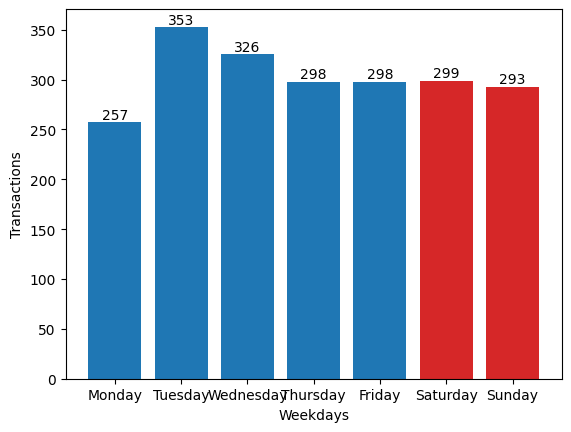

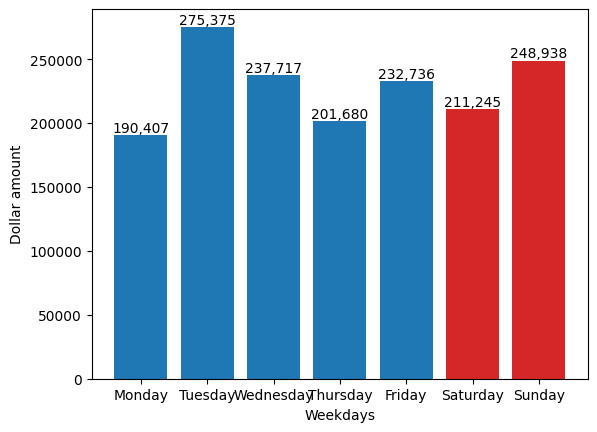

In [ ]:
def increment_date(date):
    """
    Function to increment the given date by one day.
    It takes in a date as an input and returns the incremented date by one day.
    """
    year, month, day = date.year, date.month, date.day
    next_day = day + 1
    if next_day > 31:
        next_day = 1
        month += 1
        if month > 12:
            month = 1
            year += 1
    return datetime(year, month, next_day)

if __name__ == "__main__":
    # Reading product, sales, and return transactions from respective files
    products = read_products("transactions_Products_January.csv")
    sales = read_sales("transactions_Sales_January.csv")
    returns = read_returns("transactions_Returns_January.csv")

    # Initializing dictionaries to store transactions and turnover per weekday
    transactions_per_weekday = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}
    turnover_per_weekday = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

    # Calculating transactions and turnover per weekday
    for sale in sales:
        weekday = sale['date'].strftime('%A')
        transactions_per_weekday[weekday] += 1
        turnover_per_weekday[weekday] += sale['quantity'] * products[sale['product_id']]['price'] * (1 - sale['discount'])

    # Determining the start and end date of sales transactions
    start_date = sales[0]['date']
    end_date = sales[-1]['date']

    # Initializing dictionary to count the number of occurrences of each weekday
    num_of_days = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}
    current_date = start_date

    # Counting the number of occurrences of each weekday within the date range
    while current_date <= end_date:
        weekday = current_date.strftime('%A')
        num_of_days[weekday] += 1
        current_date = increment_date(current_date)

    # Printing the table header
    print("+-----------+-----+-------------+")
    print("| Day       |NB Tr|    Turnover |")
    print("+-----------+-----+-------------+")

    # Printing transaction and turnover statistics per weekday
    for day in num_of_days.keys():
        print(f"| {day:<9} | {round(transactions_per_weekday[day]/num_of_days[day]):>3} | ${turnover_per_weekday[day]/num_of_days[day]:>10,.2f} |")
    print("+-----------+-----+-------------+")

    # Plotting bar charts for transactions and turnover per weekday
    weekdays = num_of_days.keys()
    transaction = list(transactions_per_weekday.values())
    sales = list(turnover_per_weekday.values())
    bar_colors = ['tab:blue' if day not in ['Saturday', 'Sunday'] else 'tab:red' for day in num_of_days.keys()]
    myBar = plt.bar(weekdays,height = transaction,color = bar_colors)
    plt.xlabel("Weekdays")
    plt.ylabel("Transactions")
    plt.bar_label(myBar)
    plt.show()
    myBar2 = plt.bar(weekdays,height = sales,color = bar_colors)
    plt.xlabel("Weekdays")
    plt.ylabel("Dollar amount")
    plt.bar_label(myBar2,fmt='{:,.0f}')
    plt.show()


QUESTION 3

In [ ]:
if __name__ == "__main__":
    # Reading product, sales, and return transactions from respective files
    products = read_products("transactions_Products_January.csv")
    sales = read_sales("transactions_Sales_January.csv")
    returns = read_returns("transactions_Returns_January.csv")

    # Counting the number of returns per day
    return_count_by_day = {}
    for item in returns:
        date = item["date"]
        if date in return_count_by_day:
            return_count_by_day[date] += 1
        else:
            return_count_by_day[date] = 1

    # Finding the day with the maximum number of returns
    max_count_day = None
    max_count = 0
    for date, count in return_count_by_day.items():
        if count > max_count:
            max_count = count
            max_count_day = date

    # Extracting return information for the day with the maximum returns
    data=[]
    for item in returns:
      date=item['date']
      if date==max_count_day:
        transaction_id=item['transaction_id']
        for sale in sales:
          return_info={}
          if transaction_id==sale['transaction_id']:
            return_info['product_id']=sale['product_id']
            return_info['quantity']=sale['quantity']
            price=products[sale['product_id']]['price']
            return_info['RS cost']=sale['quantity']*price*0.1
            return_info['name']=products[sale['product_id']]['name']
            data.append(return_info)

    # Extracting date information
    day_of_week = max_count_day.strftime("%A")
    month = max_count_day.strftime("%B")
    day_of_month = max_count_day.day
    year = max_count_day.year
    RS=0

    # Calculating total RS cost for returns on the day with maximum returns
    for item in data:
      RS+=item['RS cost']

    # Printing the results
    print(f"{day_of_week}, {month} {day_of_month}, {year} Total Return Shelving(RS) Cost=$ {RS:,.2f}")
    print("Products Returned that day:")
    print("{:3} {:20} {:3} {:10}".format("PID", "Product Name", "NoI", "RS Cost"))
    for item in data:
        print("{:3} {:20} {:3} ${:10,.2f}".format(item['product_id'], item['name'], item['quantity'], item['RS cost']))

Monday, January 29, 2024 Total Return Shelving(RS) Cost=$ 1,380.00
Products Returned that day:
PID Product Name         NoI RS Cost   
P18 Multidirectional mic   1 $     20.00
P17 Camera TocTic          6 $     90.00
P2  Game Laptop            1 $    200.00
P1  2-in-1 Laptop          3 $    450.00
P2  Game Laptop            1 $    200.00
P3  Titan Laptop           2 $    420.00


QUESTION 4

In [ ]:
def transactions_made(products, sales, returns):
    """
    Function to calculate units sold, revenue, and discounts for each product.
    Arguments:
        products (dict): Dictionary containing product details.
        sales (list): List of sales transactions.
        returns (list): List of return transactions.
    Returns:
        tuple: A tuple containing dictionaries of units sold, revenue, and discounts for each product.
    """
    product_units_sold = {}
    product_revenue = {}
    product_discounts = {}

    # Initializing dictionaries for units sold, revenue, and discounts for each product
    for product_id in products.keys():
        product_units_sold[product_id] = 0
        product_revenue[product_id] = 0
        product_discounts[product_id] = 0

    # Calculating units sold, revenue, and discounts for each product
    for sale in sales:
        if sale['transaction_id'] not in [return_entry['transaction_id'] for return_entry in returns]:
            product_id = sale['product_id']
            quantity = sale['quantity']
            discount = sale['discount']
            product_units_sold[product_id] += quantity
            product_revenue[product_id] += quantity * products[product_id]['price']
            product_discounts[product_id] += quantity * products[product_id]['price'] * discount

    return product_units_sold, product_revenue, product_discounts

if __name__ == "__main__":
    # Reading product, sales, and return transactions from respective files
    products = read_products("transactions_Products_January.csv")
    sales = read_sales("transactions_Sales_January.csv")
    returns = read_returns("transactions_Returns_January.csv")

    # Calculating units sold, revenue, and discounts for each product
    product_units_sold, product_revenue, product_discounts = transactions_made(products, sales, returns)

    # Displaying units sold for each product
    for product_id in products.keys():
        print(f"{product_id:3} {products[product_id]['name']:<20} {product_units_sold[product_id]:>3}")

    # Writing units sold for each product to a file
    with open("order_supplier_January.txt", 'w') as file:
        for product_id in products.keys():
            file.write(f"{product_id} # {products[product_id]['name']} # {product_units_sold[product_id]}\n")


P1  2-in-1 Laptop        192
P2  Game Laptop          164
P3  Titan Laptop         148
P4  Folding Smartphone   182
P5  Smart Smartphone     163
P6  T headphones         143
P7  Cordless Headphones  149
P8  "13"" Tablet"        191
P9  e-ink Tablet         161
P10 "10"" Tablet"        135
P11 Colour Printer       195
P12 Laser Printer        189
P13 Mega MP3             211
P14 Flat screen          185
P15 Gaming Monitor       193
P16 Camera Webcam        124
P17 Camera TocTic        109
P18 Multidirectional mic 143
P19 Drone Cam            125
P20 Health Daylight      124


QUESTION 5

In [ ]:
if __name__ == "__main__":
    # Reading product, sales, and return transactions from respective files
    products = read_products("transactions_Products_January.csv")
    sales = read_sales("transactions_Sales_January.csv")
    returns = read_returns("transactions_Returns_January.csv")

    # Counting the number of sales for each product
    sales_count = {ID_: 0 for ID_ in products.keys()}
    for sale in sales:
        if sale['transaction_id'] not in [return_entry['transaction_id'] for return_entry in returns]:
            product_id = sale['product_id']
            sales_count[product_id] += sale['quantity']

    # Finding products that were never sold
    never_sold = [product_id for product_id, count in sales_count.items() if count == 0]

    # Printing products that were never sold
    if never_sold:
        for product_id in never_sold:
            product_name = products[product_id]['name']
            print(f"{product_id:>3} {product_name:<20}")
    else:
        # Finding the minimum sales count and products with that count
        min_sales_count = min(sales_count.values())
        least_sold_products = [product_id for product_id, count in sales_count.items() if count == min_sales_count]

        # Finding dates of sales for the least sold products
        sale_dates = []
        for sale in sales:
            if sale['product_id'] in least_sold_products:
                date = sale['date'].strftime('%y/%m/%d')
                sale_dates.append(date)
        sale_dates_str = ', '.join(sale_dates)

        # Printing products with the minimum sales count and their sales dates
        for product_id in least_sold_products:
            product_name = products[product_id]['name']
            print(f"{product_id:>3} {product_name:<20} {min_sales_count:03} [{sale_dates_str}]")


P17 Camera TocTic        109 [24/01/08, 24/01/08, 24/01/09, 24/01/09, 24/01/09, 24/01/09, 24/01/09, 24/01/10, 24/01/10, 24/01/10, 24/01/10, 24/01/11, 24/01/11, 24/01/11, 24/01/11, 24/01/11, 24/01/12, 24/01/12, 24/01/12, 24/01/13, 24/01/13, 24/01/13, 24/01/13, 24/01/14, 24/01/14, 24/01/14, 24/01/14, 24/01/14, 24/01/15, 24/01/15, 24/01/15, 24/01/16, 24/01/16, 24/01/16, 24/01/16, 24/01/16, 24/01/17, 24/01/18, 24/01/18, 24/01/19, 24/01/19, 24/01/20, 24/01/21, 24/01/21, 24/01/21, 24/01/22, 24/01/24, 24/01/25, 24/01/25, 24/01/26, 24/01/26, 24/01/26, 24/01/27, 24/01/27, 24/01/27, 24/01/27, 24/01/27, 24/01/27, 24/01/28, 24/01/28, 24/01/29, 24/01/29, 24/01/29, 24/01/30, 24/01/30, 24/01/30, 24/01/31, 24/01/31]


QUESTION 6

Pearson Correlation= -0.134


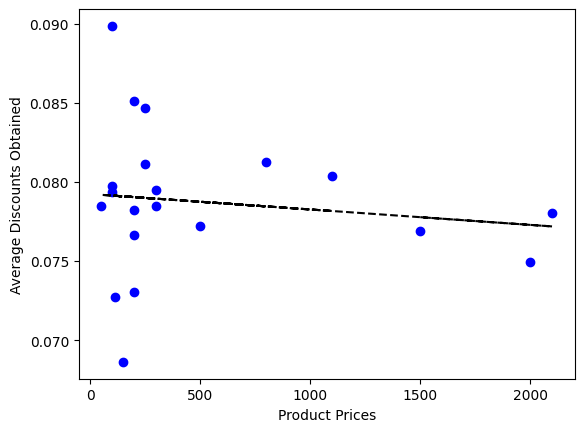

In [ ]:
if __name__ == "__main__":
    # Reading product, sales, and return transactions from respective files
    products = read_products("transactions_Products_January.csv")
    sales = read_sales("transactions_Sales_January.csv")
    returns = read_returns("transactions_Returns_January.csv")

    # Initializing dictionaries to store discounts and quantities for each product
    discounts = {pid: 0 for pid in products.keys()}
    quantity = {pid: 0 for pid in products.keys()}

    # Calculating discounts and quantities for each product, excluding returned items
    for sale in sales:
        if sale['transaction_id'] not in [return_entry['transaction_id'] for return_entry in returns]:
            pid = sale["product_id"]
            discounts[pid] += sale["discount"] * sale["quantity"]
            quantity[pid] += sale["quantity"]

    # Calculating average discount obtained for each product
    y = []
    for product_id in products.keys():
        units_sold = quantity[product_id]
        avg_discount = discounts[product_id] / units_sold
        y.append(avg_discount)

    # Extracting product prices
    x = []
    for product_id in products.keys():
        price_per_unit = products[product_id]["price"]
        x.append(price_per_unit)

    # Calculating Pearson correlation coefficient between product prices and average discounts
    r = np.corrcoef(x, y)
    print(f"Pearson Correlation= {r[0,1]:.3f}")

    # Fitting a linear regression line and plotting the data
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(x, y, 'bo', x, poly1d_fn(x), '--k')
    plt.xlabel('Product Prices')
    plt.ylabel('Average Discounts Obtained')
    plt.show()
